##### Copyright 2019 The TensorFlow Authors.

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-04-17 01:38:00--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.218.128, 2a00:1450:4013:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.218.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   148MB/s    in 1.3s    

2020-04-17 01:38:01 (148 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-04-17 01:38:03--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.218.128, 2a00:1450:4013:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.218.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/t

In [0]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [4]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock07-k03-010.png', 'rock06ck02-061.png', 'rock02-025.png', 'rock05ck01-027.png', 'rock02-015.png', 'rock05ck01-095.png', 'rock02-083.png', 'rock05ck01-059.png', 'rock06ck02-030.png', 'rock04-032.png']
['paper03-015.png', 'paper03-079.png', 'paper07-005.png', 'paper06-082.png', 'paper07-082.png', 'paper02-091.png', 'paper07-118.png', 'paper02-109.png', 'paper07-006.png', 'paper01-068.png']
['scissors04-024.png', 'scissors02-105.png', 'testscissors02-017.png', 'testscissors01-109.png', 'testscissors01-006.png', 'scissors02-087.png', 'scissors02-004.png', 'testscissors03-114.png', 'testscissors01-020.png', 'testscissors03-022.png']


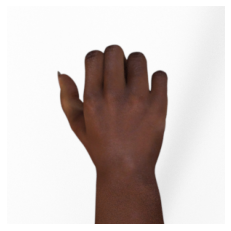

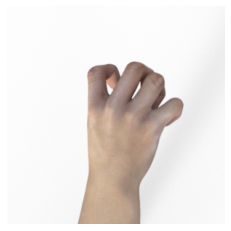

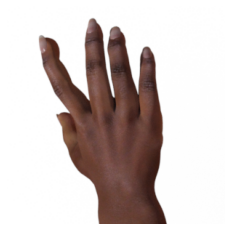

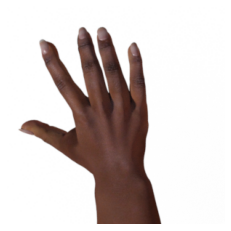

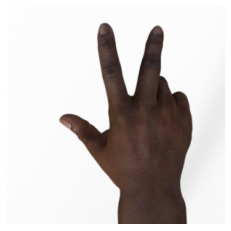

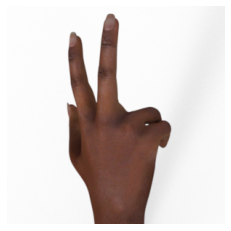

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [11]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
  batch_size = 64,
	target_size=(150,150),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
  batch_size = 64,
	target_size=(150,150),
	class_mode='categorical'
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_____________________________________

In [12]:
history = model.fit(train_generator, 
           steps_per_epoch = 40, 
           validation_steps = 6,
           epochs=25, validation_data = validation_generator, verbose = 1)

model.save("rps.h5")

Epoch 1/25
40/40 [==============================] - 20s 490ms/step - loss: 1.2056 - accuracy: 0.3488 - val_loss: 2.4633 - val_accuracy: 0.3333
Epoch 2/25
40/40 [==============================] - 20s 488ms/step - loss: 1.0430 - accuracy: 0.4718 - val_loss: 0.7157 - val_accuracy: 0.8441
Epoch 3/25
40/40 [==============================] - 20s 490ms/step - loss: 0.7832 - accuracy: 0.6615 - val_loss: 0.9961 - val_accuracy: 0.3495
Epoch 4/25
40/40 [==============================] - 19s 482ms/step - loss: 0.6002 - accuracy: 0.7429 - val_loss: 0.1806 - val_accuracy: 0.9812
Epoch 5/25
40/40 [==============================] - 19s 486ms/step - loss: 0.4415 - accuracy: 0.8246 - val_loss: 0.2471 - val_accuracy: 0.9866
Epoch 6/25
40/40 [==============================] - 19s 483ms/step - loss: 0.3280 - accuracy: 0.8778 - val_loss: 0.0312 - val_accuracy: 1.0000
Epoch 7/25
40/40 [==============================] - 20s 490ms/step - loss: 0.2895 - accuracy: 0.8948 - val_loss: 0.1764 - val_accuracy: 0.9113

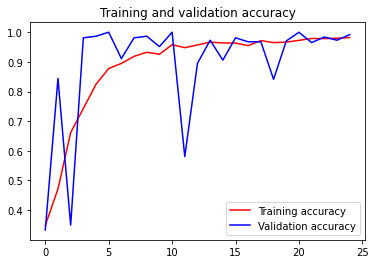

<Figure size 432x288 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

验证数据集下载地址：http://www.laurencemoroney.com/rock-paper-scissors-dataset/

In [14]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving paper1.png to paper1.png
Saving paper2.png to paper2.png
Saving paper3.png to paper3.png
Saving paper4.png to paper4.png
Saving paper5.png to paper5.png
Saving paper6.png to paper6.png
Saving paper7.png to paper7.png
Saving paper8.png to paper8.png
Saving paper9.png to paper9.png
Saving paper-hires1.png to paper-hires1.png
Saving paper-hires2.png to paper-hires2.png
Saving rock1.png to rock1.png
Saving rock2.png to rock2.png
Saving rock3.png to rock3.png
Saving rock4.png to rock4.png
Saving rock5.png to rock5.png
Saving rock6.png to rock6.png
Saving rock7.png to rock7.png
Saving rock8.png to rock8.png
Saving rock9.png to rock9.png
Saving rock-hires1.png to rock-hires1.png
Saving rock-hires2.png to rock-hires2.png
Saving scissors1.png to scissors1.png
Saving scissors2.png to scissors2.png
Saving scissors3.png to scissors3.png
Saving scissors4.png to scissors4.png
Saving scissors5.png to scissors5.png
Saving scissors6.png to scissors6.png
Saving scissors7.png to scissors7.png
Savi